In [12]:
%matplotlib inline
# Plot everything as SVG
%config InlineBackend.figure_formats=['svg']

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure some styling
palette = ['#386DF9', '#FFDC52', '#FF1614', '#62F591', '#AA22FF', '#34495E']
sns.set(font_scale=1.1, style='darkgrid', palette=palette, context='notebook')

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [13]:
criminal_data = pd.read_csv('../data/criminalbehavior.csv')
criminal_data.head()

,crime_coef,hue,criminal_behavior
0,10.099342,62.973679,0
1,49.455816,15.848373,0
2,39.200911,16.542826,1
3,39.941107,86.619647,1
4,29.957060,32.906168,1


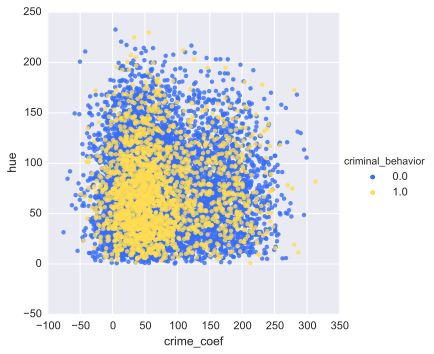

In [14]:
sns.lmplot('crime_coef', 'hue', data=criminal_data, fit_reg=False, hue='criminal_behavior')

In [15]:
# (set random state for the purposes of demonstration)
train, test = train_test_split(criminal_data[['crime_coef', 'hue', 'criminal_behavior']], train_size=0.7, random_state=1000)
X_train = train[['crime_coef', 'hue']]
y_train = train['criminal_behavior']

model = LogisticRegression()
model.fit(X_train, y_train)

m = model.coef_[0]
b = model.intercept_

print('m', m)
print('b', b)

m [-0.00010313 -0.00142717]
b [-1.25603152]


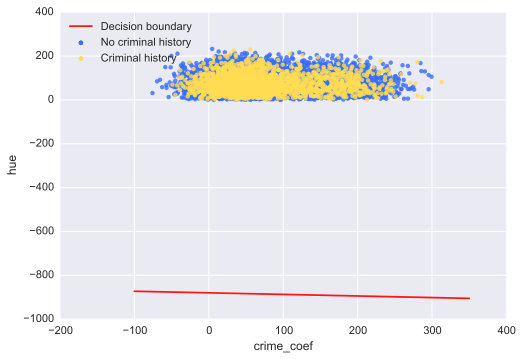

In [16]:
# Solve for y = m_1x_1 + m_2x_2 + b, where y=0, so we can plot this in 2D
def func(x):
    return -(m[0]*x + b)/m[1]

xs = np.linspace(-100, 350, 500)
ys = func(xs)
non_crim = criminal_data[criminal_data['criminal_behavior'] == 0]
crim = criminal_data[criminal_data['criminal_behavior'] == 1]
sns.regplot(non_crim['crime_coef'], non_crim['hue'], fit_reg=False, label='No criminal history')
sns.regplot(crim['crime_coef'], crim['hue'], fit_reg=False, label='Criminal history')
plt.plot(xs, ys, label='Decision boundary')
plt.legend(loc=2)

In [17]:
# See how we did
X_test = test[['crime_coef', 'hue']]
y_test = test['criminal_behavior']
y_pred = model.predict(X_test)
metrics.roc_auc_score(y_test, y_pred)

0.5

In [18]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[2388,    0],
       [ 612,    0]])

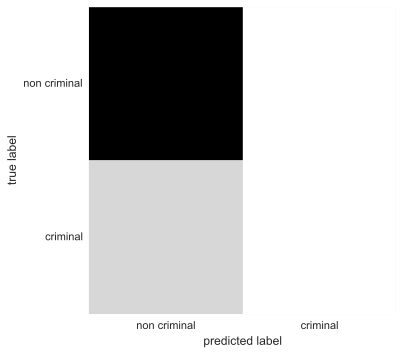

In [19]:
plt.imshow(cm, interpolation='nearest')
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.xticks([0,1],['non criminal', 'criminal'])
plt.yticks([0,1],['non criminal', 'criminal'])
plt.grid(False)

Conclusion: hue and crime coefficients are not good predictors of criminal behavior.